In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [3]:
import numpy as np
def vectorized_sequences(sequences, dim=10000):
    # tạo ma trận 0 shape len(seq),dim
    results = np.zeros((len(sequences),dim))
    for i, sequence in enumerate(sequences):
        # đánh dấu index của result[i] sang 1
        # print(i, sequence)
        results[i, sequence] = 1
    return results

In [4]:
# Prepare data
x_train = vectorized_sequences(train_data)
x_test = vectorized_sequences(test_data)

y_train = np.asarray(train_labels, dtype='float32')
y_test = np.asarray(test_labels,dtype='float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [5]:
from keras import models, layers

In [6]:
# Normal model
normal_model = models.Sequential()
normal_model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
normal_model.add(layers.Dense(16,activation='relu'))
normal_model.add(layers.Dense(1,activation='sigmoid'))
normal_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
normal_history = normal_model.fit(partial_x_train,partial_y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s - loss: 0.5157 - acc: 0.7895 - val_loss: 0.4009 - val_acc: 0.8653
Epoch 2/20
15000/15000 [==============================] - 2s - loss: 0.3146 - acc: 0.9029 - val_loss: 0.3247 - val_acc: 0.8787
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.2319 - acc: 0.9246 - val_loss: 0.2808 - val_acc: 0.8923
Epoch 4/20
15000/15000 [==============================] - 2s - loss: 0.1816 - acc: 0.9430 - val_loss: 0.2729 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 0.1495 - acc: 0.9513 - val_loss: 0.2780 - val_acc: 0.8891
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 0.1209 - acc: 0.9631 - val_loss: 0.3221 - val_acc: 0.8807
Epoch 7/20
15000/15000 [==============================] - 2s - loss: 0.1031 - acc: 0.9692 - val_loss: 0.3045 - val_acc: 0.8848
Epoch 8/20
15000/15000 [==============================] - 2s 

In [8]:
from keras import regularizers
reg_model = models.Sequential()
reg_model.add(layers.Dense(16,
                           kernel_regularizer=regularizers.l2(0.001),
                          activation='relu',input_shape=(10000,)))
reg_model.add(layers.Dense(16,
                           kernel_regularizer=regularizers.l2(0.0001),
                          activation='relu'))
reg_model.add(layers.Dense(1,activation='sigmoid'))

reg_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [9]:
reg_history = reg_model.fit(partial_x_train,partial_y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s - loss: 0.5582 - acc: 0.7689 - val_loss: 0.4649 - val_acc: 0.8280
Epoch 2/20
15000/15000 [==============================] - 2s - loss: 0.3532 - acc: 0.8970 - val_loss: 0.3482 - val_acc: 0.8843
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.2820 - acc: 0.9191 - val_loss: 0.3605 - val_acc: 0.8682
Epoch 4/20
15000/15000 [==============================] - 2s - loss: 0.2456 - acc: 0.9316 - val_loss: 0.3167 - val_acc: 0.8896
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 0.2261 - acc: 0.9370 - val_loss: 0.3312 - val_acc: 0.8832
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 0.2066 - acc: 0.9469 - val_loss: 0.3563 - val_acc: 0.8736
Epoch 7/20
15000/15000 [==============================] - 2s - loss: 0.1948 - acc: 0.9520 - val_loss: 0.3392 - val_acc: 0.8854
Epoch 8/20
15000/15000 [==============================] - 2s 

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

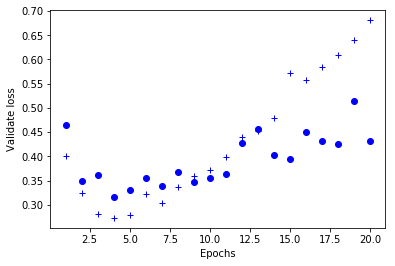

In [11]:
# plot val_loss giua normal va reg model
val_loss_normal = normal_history.history.get('val_loss')
val_loss_reg = reg_history.history.get('val_loss')
plt.plot(range(1,len(val_loss_normal)+1), val_loss_normal,'b+')
plt.plot(range(1,len(val_loss_reg)+1),val_loss_reg,'bo')
plt.xlabel('Epochs')
plt.ylabel('Validate loss')
plt.show()

In [12]:
dropout_model = models.Sequential()
dropout_model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(16,activation='relu'))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(1,activation='sigmoid'))
dropout_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
dropout_history = dropout_model.fit(partial_x_train,partial_y_train,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s - loss: 0.6483 - acc: 0.6230 - val_loss: 0.5780 - val_acc: 0.6635
Epoch 2/20
15000/15000 [==============================] - 2s - loss: 0.5598 - acc: 0.7856 - val_loss: 0.5138 - val_acc: 0.7915
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.5022 - acc: 0.8491 - val_loss: 0.4781 - val_acc: 0.8249
Epoch 4/20
15000/15000 [==============================] - 2s - loss: 0.4549 - acc: 0.8823 - val_loss: 0.4482 - val_acc: 0.8668
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 0.4193 - acc: 0.9044 - val_loss: 0.4815 - val_acc: 0.8264
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 0.3846 - acc: 0.9145 - val_loss: 0.4320 - val_acc: 0.8655
Epoch 7/20
15000/15000 [==============================] - 2s - loss: 0.3531 - acc: 0.9259 - val_loss: 0.4685 - val_acc: 0.8530
Epoch 8/20
15000/15000 [==============================] - 2s 

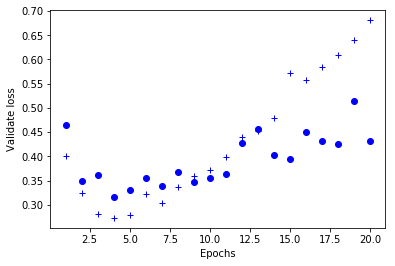

In [14]:
val_loss_drop = dropout_history.history['val_loss']
plt.clf()
plt.plot(range(1,len(val_loss_normal)+1), val_loss_normal,'b+')
plt.plot(range(1,len(val_loss_drop)+1),val_loss_reg,'bo')
plt.xlabel('Epochs')
plt.ylabel('Validate loss')
plt.show()